In [1]:
!git clone https://github.com/oshimamasara/CNN-DATASET-NOTE.git

Cloning into 'CNN-DATASET-NOTE'...
remote: Enumerating objects: 81470, done.
remote: Total 81470 (delta 0), reused 0 (delta 0), pack-reused 81470
Receiving objects: 100% (81470/81470), 43.00 MiB | 19.26 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [2]:
%cd CNN-DATASET-NOTE

/kaggle/working/CNN-DATASET-NOTE


In [3]:
!find train -type f | wc -l

81463


In [4]:
import gc
gc.collect()

15

In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tqdm import tqdm

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Using TensorFlow backend.


In [6]:
col_Names=["id", "label"]
train = pd.read_csv("train_after.csv",names=col_Names)

In [7]:
import time
time.sleep(5)

In [8]:
train_image = []
for i in tqdm(range(train.shape[0])):
#for i in range(1):
    img = image.load_img('train/'+train['id'][i]+'.png',  grayscale=True)
    #print(type(img))
    #print(img.mode)
    img = image.img_to_array(img)
    #img = img/255
    train_image.append(img)
X = np.array(train_image)

  0%|          | 0/81463 [00:00<?, ?it/s]/opt/conda/lib/python3.6/site-packages/keras_preprocessing/image/utils.py:104: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '
100%|██████████| 81463/81463 [00:43<00:00, 1886.62it/s]


In [9]:
del train_image

In [10]:
del img

In [11]:
gc.collect()

4

In [12]:
y=train['label'].values

y = to_categorical(y)

In [13]:
time.sleep(5)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [15]:
del X
del y

In [16]:
gc.collect()

10

In [17]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(128,128,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(26, activation='softmax'))

In [18]:
print(model.input_shape)
print(model.output_shape)

(None, 128, 128, 1)
(None, 26)


In [19]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 246016)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               31490176  
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [20]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [21]:
time.sleep(5)

In [22]:
fit = model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test))

Train on 65170 samples, validate on 16293 samples
Epoch 1/15
65170/65170 [==============================] - 67s 1ms/step - loss: 9.1923 - accuracy: 0.0544 - val_loss: 3.2533 - val_accuracy: 0.0569
Epoch 2/15
65170/65170 [==============================] - 65s 992us/step - loss: 3.2546 - accuracy: 0.0547 - val_loss: 3.2531 - val_accuracy: 0.0569
Epoch 3/15
65170/65170 [==============================] - 65s 991us/step - loss: 3.2545 - accuracy: 0.0547 - val_loss: 3.2535 - val_accuracy: 0.0569
Epoch 4/15
65170/65170 [==============================] - 65s 993us/step - loss: 3.2849 - accuracy: 0.0546 - val_loss: 3.2531 - val_accuracy: 0.0569
Epoch 5/15
65170/65170 [==============================] - 65s 991us/step - loss: 3.2546 - accuracy: 0.0547 - val_loss: 3.2533 - val_accuracy: 0.0569
Epoch 6/15
65170/65170 [==============================] - 65s 991us/step - loss: 3.2546 - accuracy: 0.0547 - val_loss: 3.2532 - val_accuracy: 0.0569
Epoch 7/15
65170/65170 [==============================] - 

In [23]:
score = model.evaluate(X_test, y_test, verbose=1)
print("ロス　" + str(score[0]))
print("精度　" + str(score[1]))

16293/16293 [==============================] - 4s 271us/step
ロス　3.253008893947827
精度　0.05689559876918793


KeyError: 'acc'

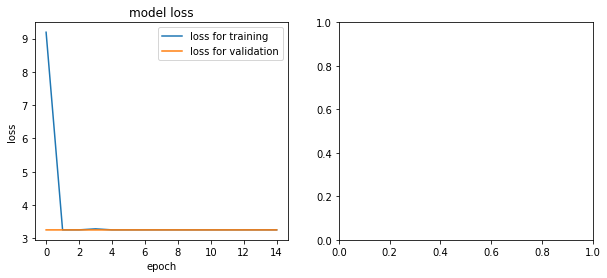

In [24]:
fig, (axL, axR) = plt.subplots(ncols=2, figsize=(10,4))
def plot_history_loss(hist):
    axL.plot(fit.history['loss'],label="loss for training")
    axL.plot(fit.history['val_loss'],label="loss for validation")
    axL.set_title('model loss')
    axL.set_xlabel('epoch')
    axL.set_ylabel('loss')
    axL.legend(loc='upper right')

def plot_history_acc(hist):
    axR.plot(fit.history['acc'],label="acc for training")
    axR.plot(fit.history['val_acc'],label="acc for validation")
    axR.set_title('model accuracy')
    axR.set_xlabel('epoch')
    axR.set_ylabel('accuracy')
    axR.legend(loc='right')

plot_history_loss(fit)
plot_history_acc(fit)

In [25]:
model.save('abc.h5') 

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model_file('abc.h5')
tflite_model = converter.convert()
open('abc.tflite', 'wb').write(tflite_model)

In [ ]:
from IPython.display import FileLink, HTML
file_url = FileLink(r'abc.tflite')
file_url

#### LINK 404 error

```https://www.kaggleusercontent.com/k/22303981/eyJlbmMiOiAiQTEyOENCQy1IUzI1NiIsICJhbGciOiAiZGlyIn0..fnG8RiGj-roa370uOc0LRA.B5cb_3ulOxKJt5wBCq087KPrjC1EEqtaVGrvGJvdRvX-H3v0w3ObmnNxx5wc8iR6y39P-W0iI5OdIOGQ94ho7ezJIFv4MQS5z1iw6BkSPjI.BlZJ4k9UEZyto_iCoXRlBA/proxy/notebooks/abc.tflite```


In [ ]:
import os
os.path.getsize('abc.tflite')

In [ ]:
!pip install dropbox

In [ ]:
import sys
import dropbox

from dropbox.files import WriteMode
from dropbox.exceptions import ApiError, AuthError

# Access token
TOKEN = 'K7Y8L-2ZaWEAAAAAAAAA5Jm2og2zzQygeVLpQ6PaRI60B6HJ2jTADXShH9aWkmNu'

LOCALFILE = 'abc.tflite'
BACKUPPATH = '/abc.tflite' # Keep the forward slash before destination filename


# Uploads contents of LOCALFILE to Dropbox
def backup():
    with open(LOCALFILE, 'rb') as f:
        # We use WriteMode=overwrite to make sure that the settings in the file
        # are changed on upload
        print("Uploading " + LOCALFILE + " to Dropbox as " + BACKUPPATH + "...")
        try:
            dbx.files_upload(f.read(), BACKUPPATH, mode=WriteMode('overwrite'))
        except ApiError as err:
            # This checks for the specific error where a user doesn't have enough Dropbox space quota to upload this file
            if (err.error.is_path() and
                    err.error.get_path().error.is_insufficient_space()):
                sys.exit("ERROR: Cannot back up; insufficient space.")
            elif err.user_message_text:
                print(err.user_message_text)
                sys.exit()
            else:
                print(err)
                sys.exit()


# Adding few functions to check file details
def checkFileDetails():
    print("Checking file details")

    for entry in dbx.files_list_folder('').entries:
        print("File list is : ")
        print(entry.name)


# Run this script independently
if __name__ == '__main__':
    # Check for an access token
    if (len(TOKEN) == 0):
        sys.exit("ERROR: Looks like you didn't add your access token. Open up backup-and-restore-example.py in a text editor and paste in your token in line 14.")

    # Create an instance of a Dropbox class, which can make requests to the API.
    print("Creating a Dropbox object...")
    dbx = dropbox.Dropbox(TOKEN)

    # Check that the access token is valid
    try:
        dbx.users_get_current_account()
    except AuthError as err:
        sys.exit(
            "ERROR: Invalid access token; try re-generating an access token from the app console on the web.")

    try:
        checkFileDetails()
    except Error as err:
        sys.exit("Error while checking file details")

    print("Creating backup...")
    # Create a backup of the current settings file
    backup()

    print("Done!")

In [27]:
%ll ../../input/

total 8
drwxr-xr-x 2 root 4096 Oct 21 15:52 abcdata/
drwxr-xr-x 2 root 4096 Oct 21 15:52 cnn-data/


In [37]:
from keras.models import load_model
from keras.preprocessing.image import img_to_array, load_img

test_model = load_model('abc.h5')
img = load_img('../../input/abcdata/C.png',color_mode = "grayscale")
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
preds = test_model.predict_classes(x)
prob = test_model.predict_proba(x)
print(preds)
print(prob)

[8]
[[0.03721996 0.03768918 0.04083384 0.03657823 0.0361665  0.03786057
  0.03599723 0.03578237 0.05543232 0.03599525 0.03528042 0.04094544
  0.0370861  0.03900221 0.03933973 0.03855209 0.0360977  0.03740773
  0.03866421 0.03692229 0.03838862 0.04044197 0.03762729 0.03885142
  0.03689283 0.03894451]]


In [38]:
new_dir_list = [] 
new_dir_list_name = 'A'
for i in range(0, 26): 
    new_dir_list.append(new_dir_list_name) 
    new_dir_list_name = chr(ord(new_dir_list_name) + 1)

ABC = preds.tolist()
ABC = int(ABC[0])
print(new_dir_list[ABC])

I
